## **Programming Assignment 1 : Data Preparation and Understanding**

In [1]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure, filters
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage.transform import resize
from skimage import img_as_ubyte

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Main execution
dog_images_folder = '/content/drive/MyDrive/mulinti_images'
annotations_folder = '/content/drive/MyDrive/mulinti_annotation'

Mounted at /content/drive


In [3]:
dog_images = {}
annotations = {}

In [4]:
# Load images and annotations
for folder_name in os.listdir(dog_images_folder):
    folder_path = os.path.join(dog_images_folder, folder_name)
    image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path)]
    dog_images[folder_name] = image_paths

for folder_name in os.listdir(annotations_folder):
    folder_path = os.path.join(annotations_folder, folder_name)
    annotation_paths = [os.path.join(folder_path, annot) for annot in os.listdir(folder_path)]
    annotations[folder_name] = annotation_paths

## **Q 2a: Cropping and Resize Images in Your 4-class Images Dataset**

Use the bounding box information
in the Annotations dataset relevant to your 4-class Images Dataset to crop the images in your dataset
and then resize each image to a 128×128 pixel image.

In [5]:
import xml.etree.ElementTree as ET

def get_bounding_boxes(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    bounding_boxes = []

    for obj in root.findall('object'):
        bbox = obj.find('bndbox')

        xmin, ymin, xmax, ymax = map(int, (bbox.find('xmin').text,
                                           bbox.find('ymin').text,
                                           bbox.find('xmax').text,
                                           bbox.find('ymax').text))

        bounding_boxes.append((xmin, ymin, xmax, ymax))

    return bounding_boxes


In [6]:
import os
from skimage import io, transform, img_as_ubyte

def process_images(image_paths, annotation_paths):
    """Crop and resize images based on bounding box annotations."""
    for i in range(len(image_paths)):
        bounding_boxes = get_bounding_boxes(annotation_paths[i])

        original_image = io.imread(image_paths[i])

        for j, bbox in enumerate(bounding_boxes):
            cropped_image = original_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]

            if cropped_image.size > 0:
                resized_image = transform.resize(cropped_image, (128, 128), anti_aliasing=True)

                resized_image = img_as_ubyte(resized_image)

                new_path = image_paths[i].replace('mulinti', 'Cropped').replace('.jpg', f'-{j}.jpg')

                os.makedirs(os.path.dirname(new_path), exist_ok=True)

                io.imsave(new_path, resized_image)


In [7]:
def process_images(image_paths, annotation_paths):
    """Crop and resize images based on bounding box annotations."""
    print("Number of image paths:", len(image_paths))
    print("Number of annotation paths:", len(annotation_paths))
    for i in range(min(len(image_paths), len(annotation_paths))):
        print("Processing image", i)
        print("Image path:", image_paths[i])
        print("Annotation path:", annotation_paths[i])
        bounding_boxes = get_bounding_boxes(annotation_paths[i])
        original_image = io.imread(image_paths[i])
        for j, bbox in enumerate(bounding_boxes):
            cropped_image = original_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
            if cropped_image.size > 0:
                resized_image = resize(cropped_image, (128, 128), anti_aliasing=True)
                resized_image = img_as_ubyte(resized_image)
                new_path = image_paths[i].replace('mulinti', 'Cropped').replace('.jpg', f'-{j}.jpg')
                os.makedirs(os.path.dirname(new_path), exist_ok=True)
                io.imsave(new_path, resized_image)

# Q 1: Cropping and Resize Images
process_images(dog_images['n02110806-basenji'], annotations['n02110806-basenji'])

Number of image paths: 441
Number of annotation paths: 209
Processing image 0
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_1019.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_1013
Processing image 1
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_1013.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_1577
Processing image 2
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_111.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_1228
Processing image 3
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_1514.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_1382
Processing image 4
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_1214.jpg
Annotation path: /content/drive/MyDrive/muli

<ipython-input-7-a946bd97602f>:18: UserWarning: /content/drive/MyDrive/Cropped_images/n02110806-basenji/n02110806_2349-0.jpg is a low contrast image
  io.imsave(new_path, resized_image)


Processing image 40
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_2580.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_2421
Processing image 41
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_2810.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_2365
Processing image 42
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_2421.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_2349
Processing image 43
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_2551.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_1942
Processing image 44
Image path: /content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_2497.jpg
Annotation path: /content/drive/MyDrive/mulinti_annotation/n02110806-basenji/n02110806_1904
Proce

## **Image Processing**
i. Choose 2 images from each class.

ii. Convert the color images to grayscale images

iii. Plot the 8 grayscale images with their corresponding pixel intensity histograms

iv. Using the 8 grayscale images above, perform edge detection

v. Plot the 8 edge images


In [14]:
import os
from skimage import io, color, exposure, filters
import matplotlib.pyplot as plt

def image_processing(dog_images):
    """Image Processing."""
    selected_images = []
    for cls in dog_images.keys():
        selected_images.extend(dog_images[cls][:2])
        if len(selected_images) >= 8:
            break
    selected_images = selected_images[:8]

    plt.figure(figsize=(20, 10))
    for idx, img_path in enumerate(selected_images, 1):
        img = io.imread(img_path)
        gray_img = color.rgb2gray(img)

        plt.subplot(2, 8, idx)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Gray Image')

        plt.subplot(2, 8, idx + 8)
        hist, bins = exposure.histogram(gray_img, nbins=256)
        plt.plot(bins, hist)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title('Histogram')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 10))
    for idx, img_path in enumerate(selected_images, 1):
        img = io.imread(img_path)
        gray_img = color.rgb2gray(img)

        edges = filters.sobel(gray_img)

        plt.subplot(2, 8, idx)
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Image')

    plt.tight_layout()
    plt.show()


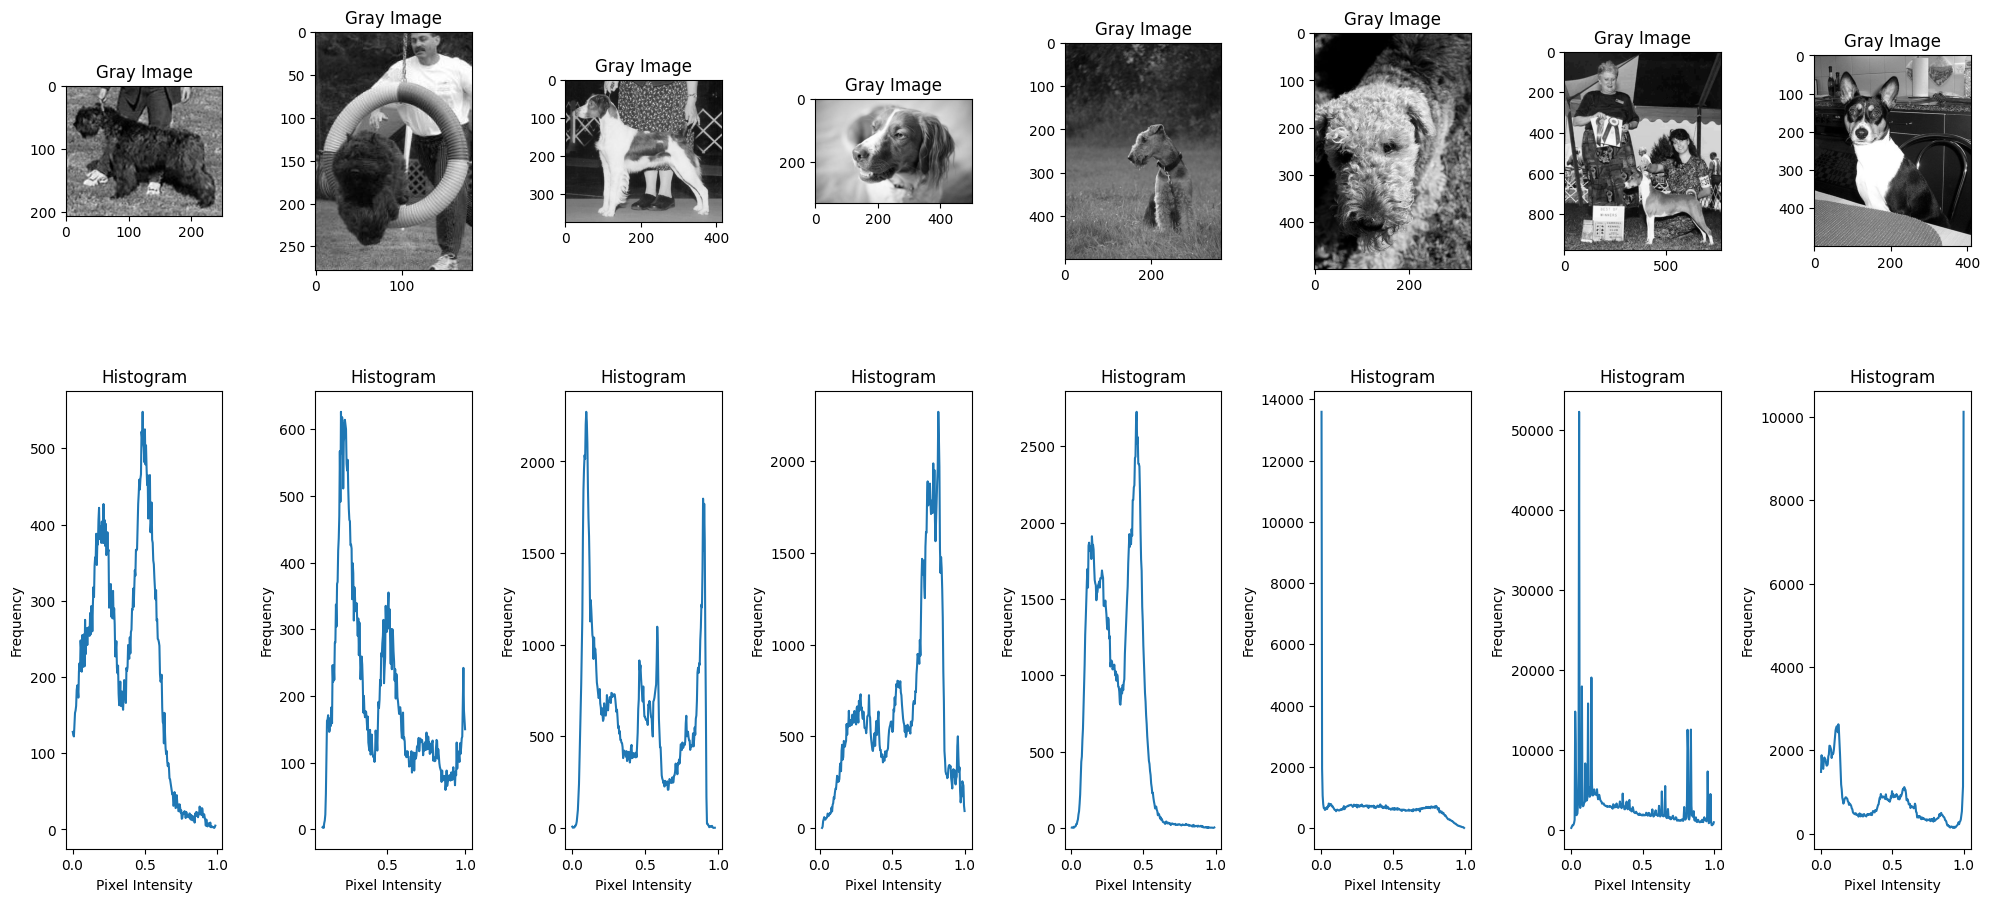

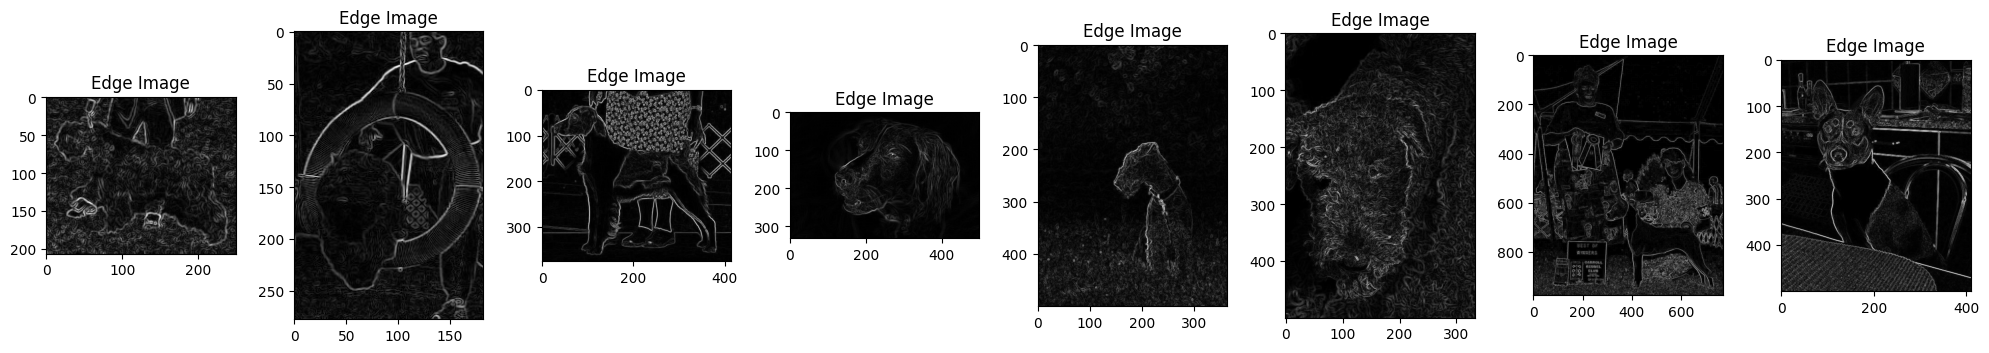

In [15]:
# Q 2b: Image Processing
image_processing(dog_images)

## **Edge histogram**

i. Choose 1 image from each class.

ii. Convert the color images to grayscale images

iii. For each image 𝐼, use the following
import numpy as np
from skimage import filters
def angle(dx, dy):
"""Calculate the angles between horizontal and vertical operators."""
return np.mod(np.arctan2(dy, dx), np.pi)
angle_sobel = angle(filters.sobel_h(I),
filters.sobel_v(I))
to obtain an “angle” for each pixel in the images (Intuitively, one can think of the “angle” as
the direction of edge gradient at the pixel).

iv. Use skimage.exposure.histogram to obtain a histogram with 36
bins. (1 point)

v. Plot the images with their corresponding edge histogram values (add x-axis label “Bins” and
y-axis label “Pixel Count” ). (1 point)

In [ ]:
def edge_histogram(image_path):
    """Edge histogram."""
    img = io.imread(image_path)
    gray_img = color.rgb2gray(img)
    dx, dy = np.gradient(gray_img)
    angle_sobel = np.mod(np.arctan2(dy, dx), np.pi)
    hist, bins = exposure.histogram(angle_sobel, nbins=36)
    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Image')
    plt.subplot(1, 2, 2)
    plt.bar(bins, hist, width=np.pi / 18)
    plt.xlabel('Bins')
    plt.ylabel('Pixel Count')
    plt.title('Edge Histogram')
    plt.show()

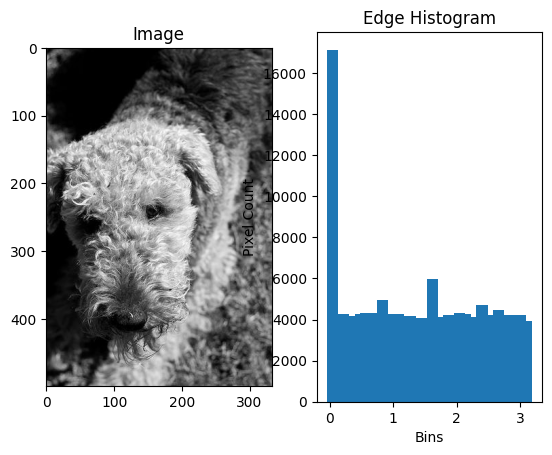

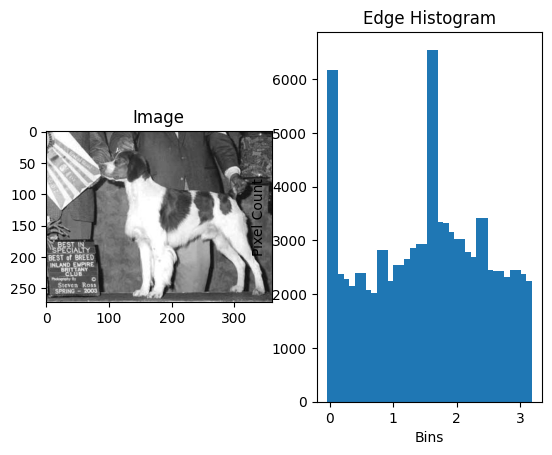

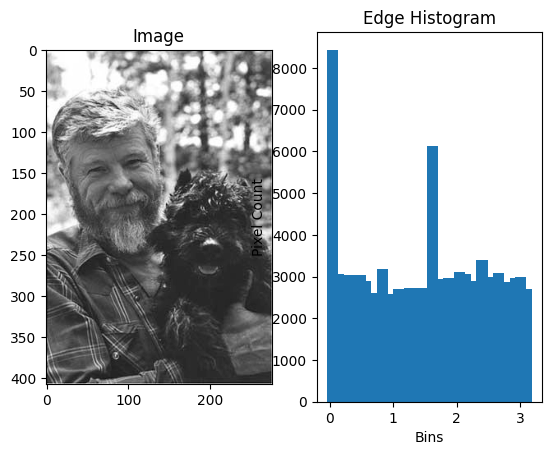

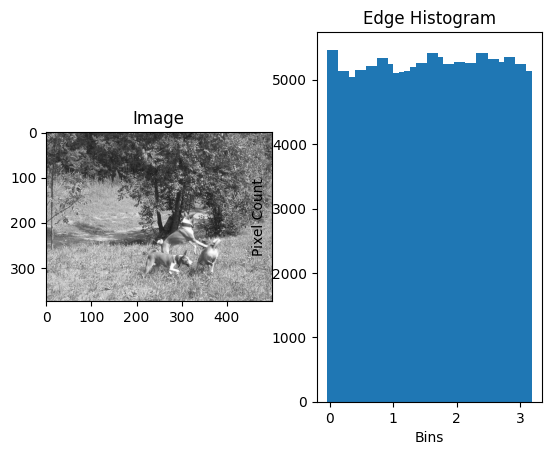

In [ ]:
# Q 2c: Edge histogram
edge_histogram('/content/drive/MyDrive/mulinti_images/n02096051-Airedale/n02096051_1017.jpg')
edge_histogram('/content/drive/MyDrive/mulinti_images/n02101388-Brittany_spaniel/n02101388_2689.jpg')
edge_histogram('/content/drive/MyDrive/mulinti_images/n02106382-Bouvier_des_Flandres/n02106382_1731.jpg')
edge_histogram('/content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_849.jpg')

## **Histogram Comparison (Measures of Similarity and Dissimilarity)**

i. Pick 2 images from the same class and 1 image from another class.

ii. Convert the three images to edge histograms. (These will be the vector representations of the
images)

iii. Perform histogram comparison using the following metrics/measures.
• Euclidean distance
2
• Manhattan distance
• Cosine distance
Using the 3 images above, you will compare histograms by computing the metrics/measures
of (1) the 2 images from the same class, AND (2) 2 images from different classes. (1.5 points)

In [ ]:
def histogram_comparison(img_path1, img_path2, img_path3):
    """Histogram Comparison."""
    images = [io.imread(img_path1), io.imread(img_path2), io.imread(img_path3)]
    for i, img in enumerate(images):
        gray_img = color.rgb2gray(img)
        hist, bins = exposure.histogram(gray_img, nbins=256)
        plt.plot(bins, hist, label=f'Image {i + 1}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title('Histogram Comparison')
        plt.legend()
        plt.show()


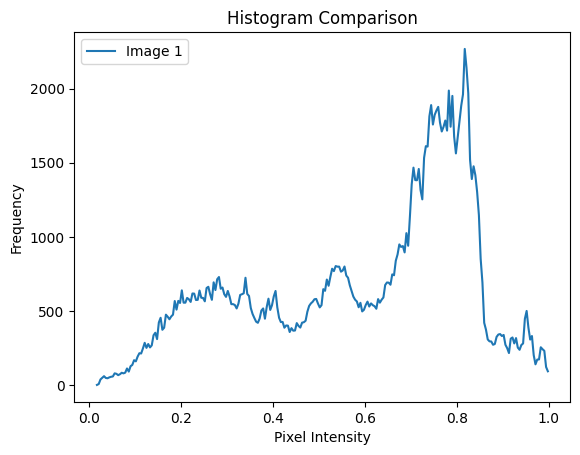

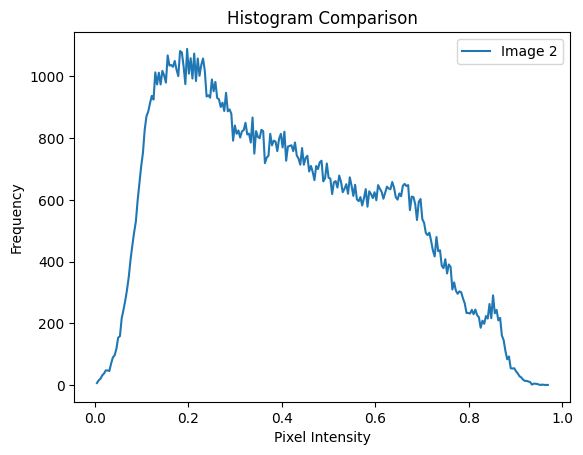

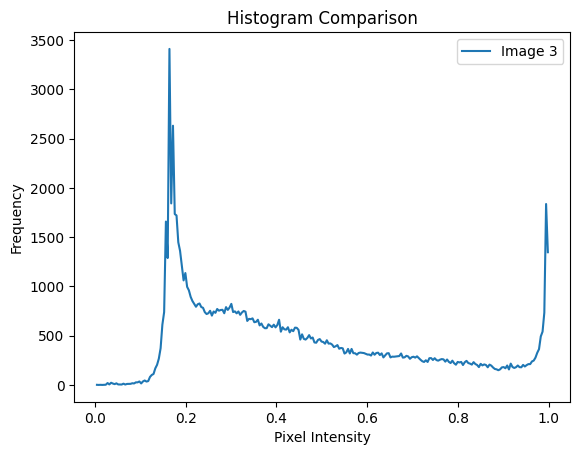

In [ ]:
# Q 2d: Histogram Comparison
histogram_comparison('/content/drive/MyDrive/mulinti_images/n02101388-Brittany_spaniel/n02101388_10017.jpg', '/content/drive/MyDrive/mulinti_images/n02101388-Brittany_spaniel/n02101388_10107.jpg', '/content/drive/MyDrive/mulinti_images/n02106382-Bouvier_des_Flandres/n02106382_1731.jpg')

## **Histogram of Oriented Gradient (HOG) feature descriptor**

i. Pick 1 image and compute its HOG descriptors. Visualise the image and the HOG descriptors
for the image

In [ ]:
def hog_descriptor(image_path):
    """Histogram of Oriented Gradient (HOG) feature descriptor."""
    img = io.imread(image_path)
    gray_img = color.rgb2gray(img)
    orientations = 9
    pixels_per_cell = (8, 8)
    cells_per_block = (2, 2)
    hog_features, hog_image = hog(gray_img, orientations=orientations,
                                  pixels_per_cell=pixels_per_cell,
                                  cells_per_block=cells_per_block,
                                  block_norm='L2-Hys',
                                  visualize=True, multichannel=False)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
    ax1.imshow(gray_img, cmap=plt.cm.gray)
    ax1.set_title('Input Image')
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

<ipython-input-14-783f5f18223a>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(gray_img, orientations=orientations,


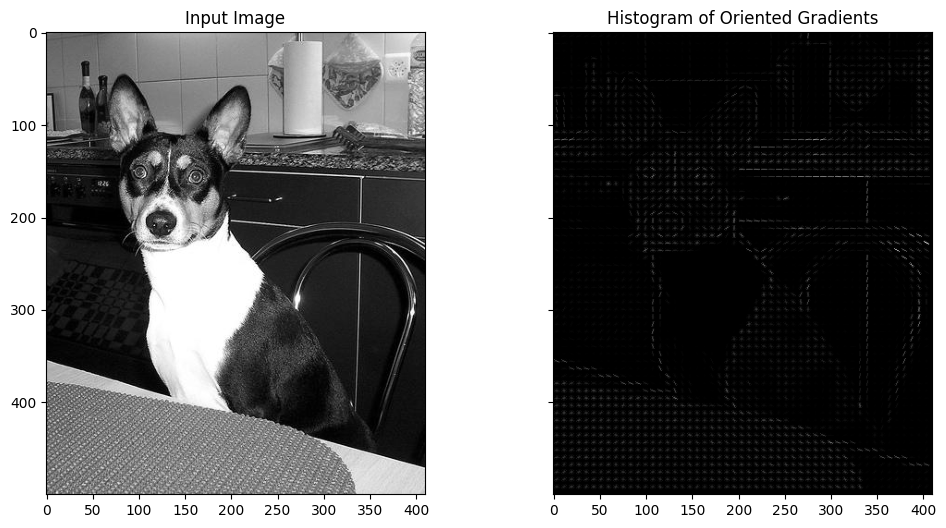

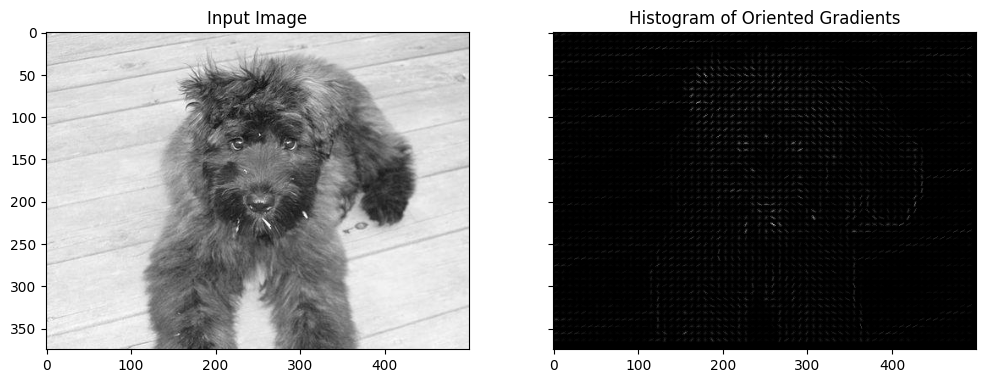

In [ ]:
# Q 2e: Histogram of Oriented Gradient (HOG) feature descriptor
hog_descriptor('/content/drive/MyDrive/mulinti_images/n02110806-basenji/n02110806_1013.jpg')
hog_descriptor('/content/drive/MyDrive/mulinti_images/n02106382-Bouvier_des_Flandres/n02106382_1000.jpg')

## **Dimensionality reduction (using Principal Component Analysis, PCA)**
i. Use images from any two classes.

ii. Convert all the images from the two classes to edge histograms.(0.5 points)

iii. Perform Principal Component Analysis (PCA) dimensionality reduction on the set of histograms to reduce from 36 to 2 dimensions. (Note: You should not use the class labels) (1
point)

iv. Plot the 2D points using 2 different colors for data from the 2 classes (see Figure 1). Are your
data from the two classes separable? (1 point)

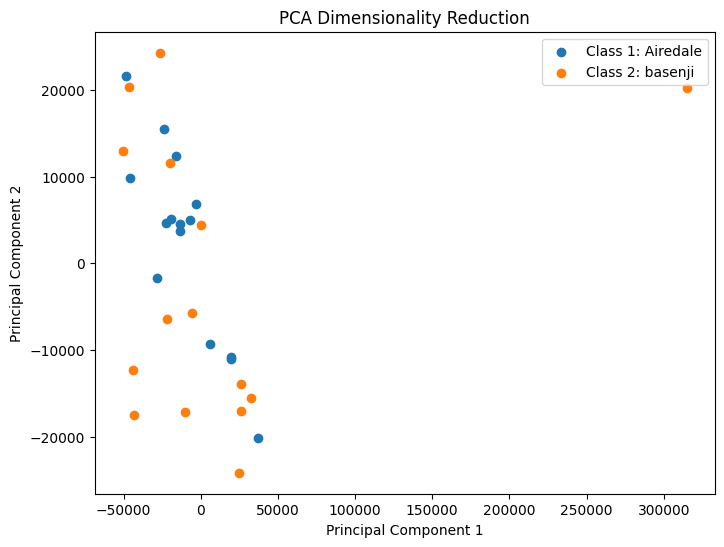

In [20]:
import numpy as np
import os
from skimage import io, color, exposure, filters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca_dimensionality_reduction(edge_hist_vectors):
    """Dimensionality reduction (using Principal Component Analysis, PCA)."""
    if not edge_hist_vectors:
        print("Error: Input array is empty.")
        return
    X = np.vstack(edge_hist_vectors)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))

    plt.scatter(reduced_data[:15, 0], reduced_data[:15, 1], label='Class 1: Airedale')
    plt.scatter(reduced_data[15:, 0], reduced_data[15:, 1], label='Class 2: basenji')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Dimensionality Reduction')
    plt.legend()
    plt.show()

# Q 2f: Dimensionality reduction (using Principal Component Analysis, PCA)
edge_hist_vectors = []

for img_path in dog_images['n02096051-Airedale'][:15] + dog_images['n02110806-basenji'][:15]:
    img = io.imread(img_path)
    gray_img = color.rgb2gray(img)
    edges = filters.sobel(gray_img)  # Edge detection
    hist, _ = exposure.histogram(edges, nbins=36)  # Histogram calculation
    edge_hist_vectors.append(hist)

pca_dimensionality_reduction(edge_hist_vectors)
